In [60]:
file_num =10

# Directory containing the .npy files
directory = '/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13'

/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_0.npy
/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_30.npy
/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_60.npy
/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_90.npy
/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_120.npy
/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_150.npy
/media/adam/Unix_Partition2/docker_neural_ope

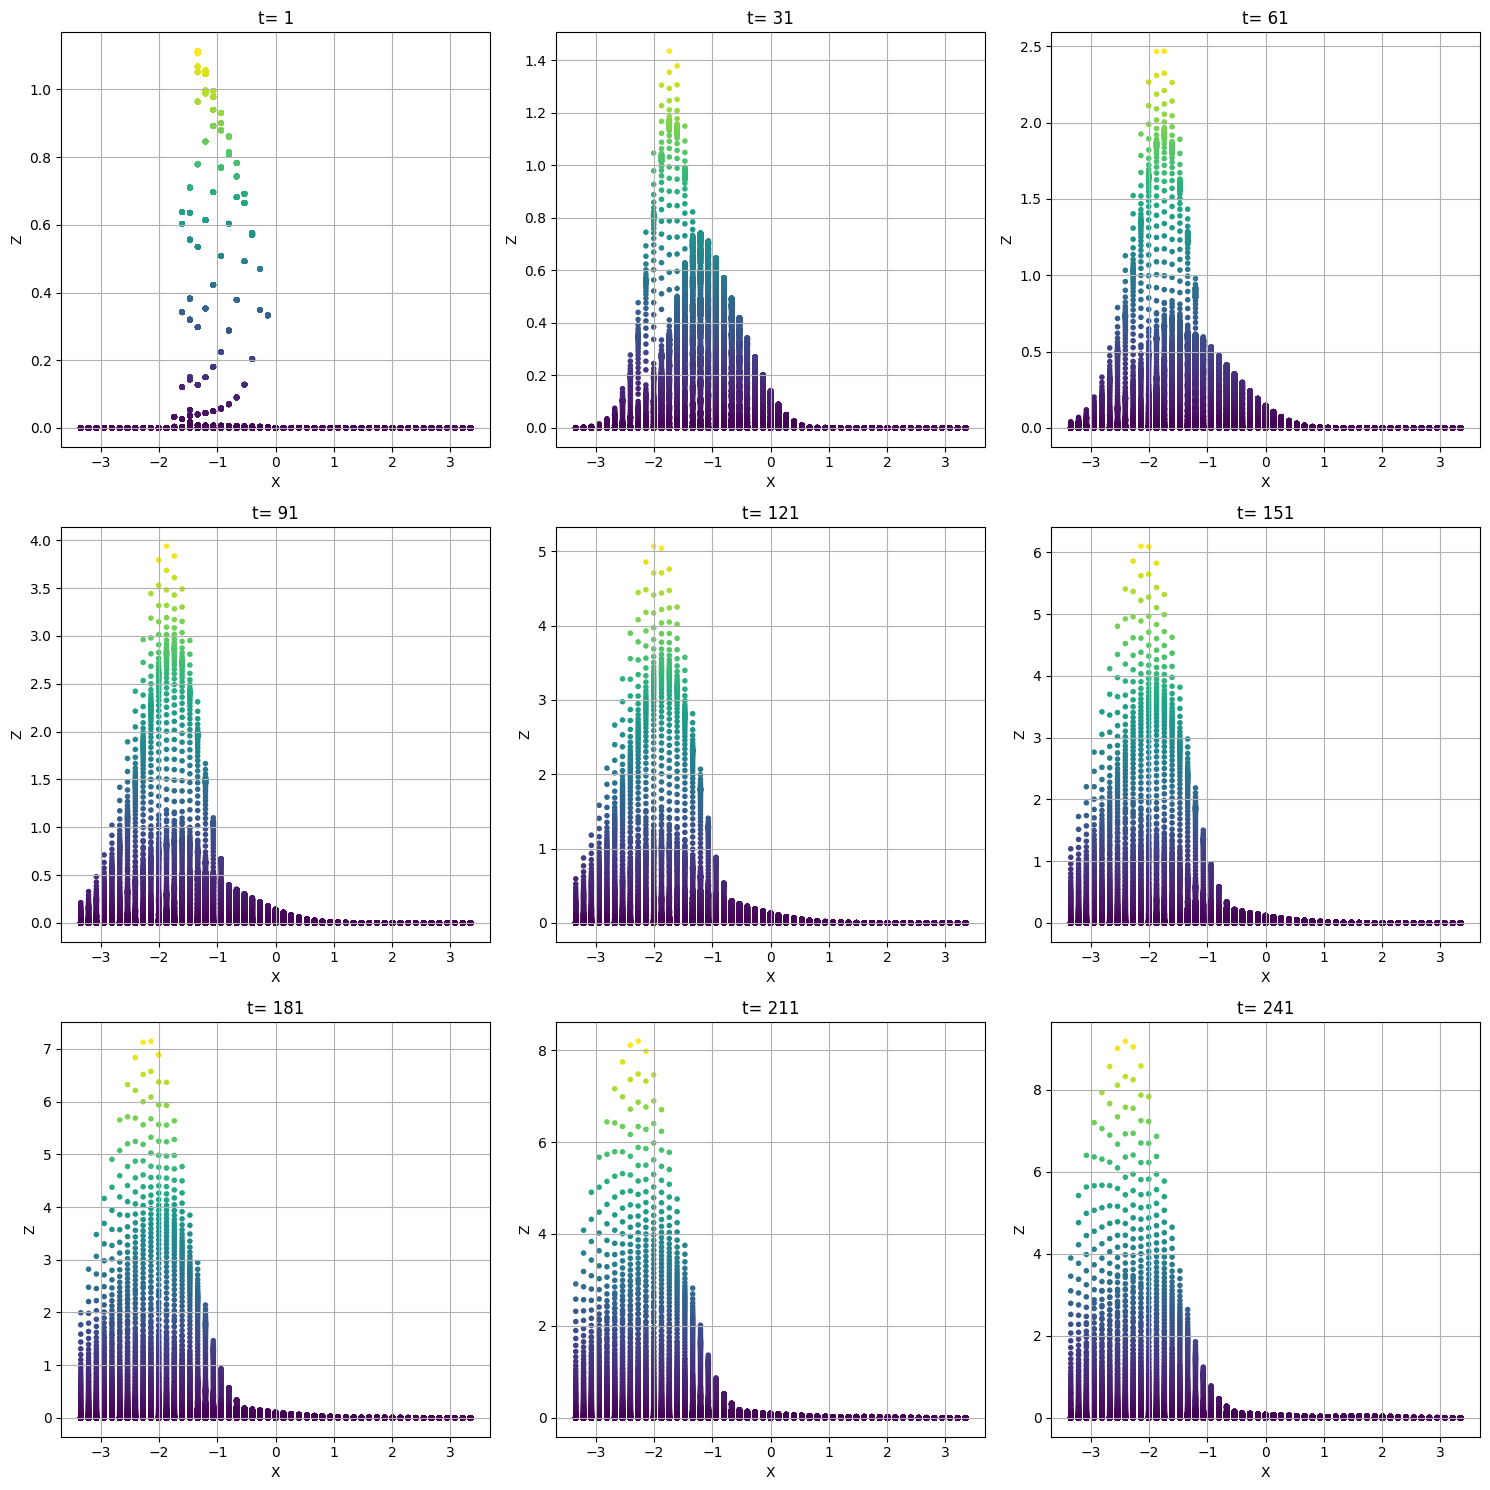

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Get the list of .npy files
file_list = [file for file in os.listdir(directory) if file.endswith('.npy')]
file_list = sorted(file_list, key=lambda x: int(x.split('_')[1].split('.')[0]))

# Determine the number of files and the number of subplots
num_files = len(file_list)
num_plots = min(num_files // 30, 9)  # Limit to 9 plots

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

threshold_x = 3.345
threshold_y = 3.2
threshold_z = 1
for i in range(num_plots):
    file_index = i * 30
    file_path = os.path.join(directory, file_list[file_index])
    print(file_path)
    data = np.load(file_path)
    x = data[0, :]; x[x > threshold_x] = 0; x[x < -threshold_x] = 0
    y = data[1, :]; y[y > threshold_y] = 0; y[y < -threshold_y] = 0
    z = data[2, :]
    z[z < 0] = 0  
    z = np.sqrt(z) # for visualization
    ax = axs[i // 3, i % 3]
    ax.scatter(x, z, c=z, marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_title(f't= {file_index + 1}')
    ax.grid(True)

plt.tight_layout()
plt.show()


/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_0.npy
/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_30.npy
/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_60.npy
/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_90.npy
/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_120.npy
/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_150.npy
/media/adam/Unix_Partition2/docker_neural_ope

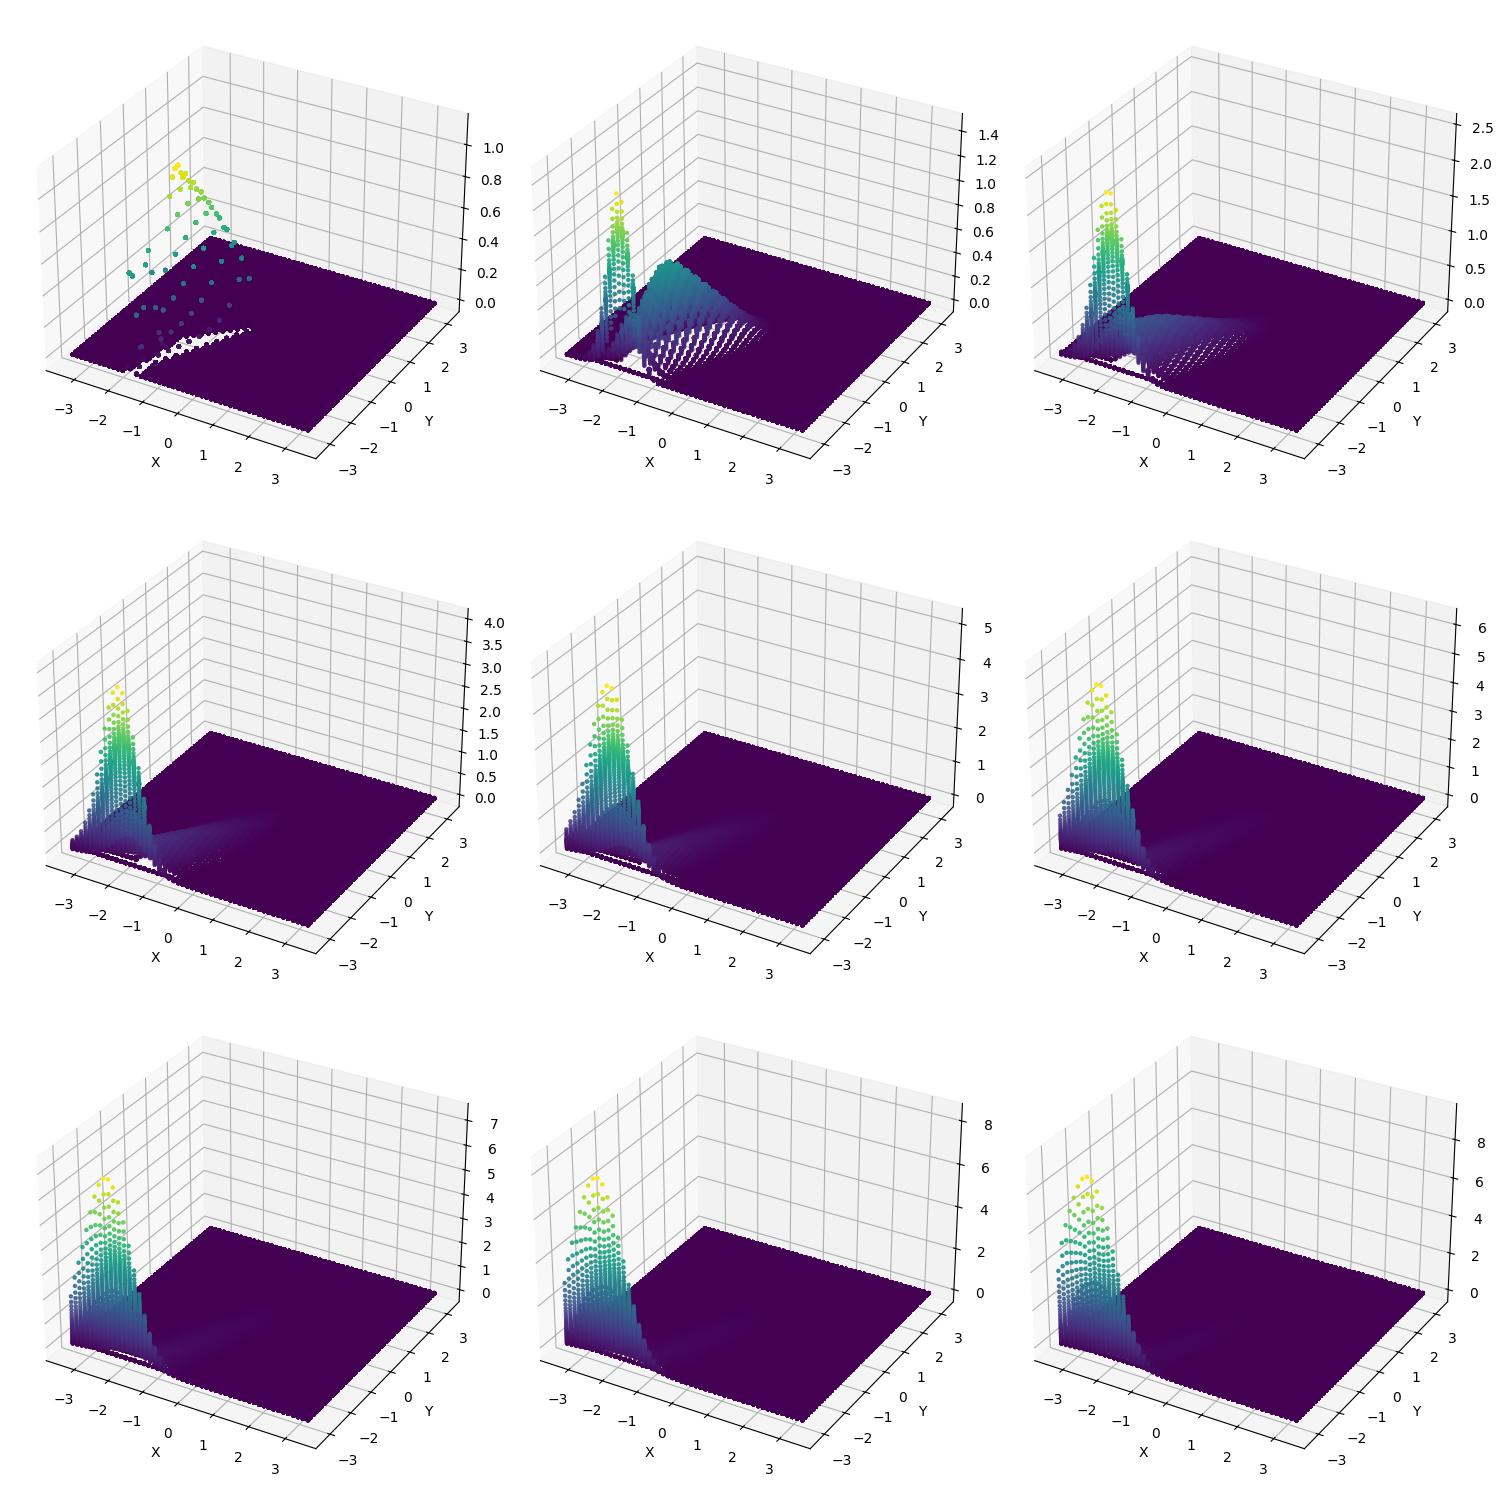

In [62]:
# Determine the number of files and the number of subplots
num_files = len(file_list)
num_plots = min(num_files // 30, 9)  # Limit to 9 plots

# Create a 3x3 grid of subplots
fig = plt.figure(figsize=(15, 15))

for i in range(num_plots):
    file_index = i * 30
    ax = fig.add_subplot(3, 3, i + 1, projection='3d')
    file_path = os.path.join(directory, file_list[file_index])
    print(file_path)
    data = np.load(file_path)
    x = data[0, :]; x[x > threshold_x] = 0; x[x < -threshold_x] = 0
    y = data[1, :]; y[y > threshold_y] = 0; y[y < -threshold_y] = 0
    z = data[2, :]
    z[z < 0] = 0  
    z = np.sqrt(z) # for visualization
    
    ax.scatter(x, y, z, c=z, marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Testing Posterior Calculation

### This is my own creation - I would like to keep working on this after my dissertation has been finished

Posterior Calculation 
$$
\rho(\mathbf{y}(t)|\mathbf{x}(t))\frac{\partial\rho}{\partial t}=\frac{1}{Z}\rho(\mathbf{y}(t)|\mathbf{x}(t))\left(-\nabla\cdot(\rho\mathbf{f})+\frac{1}{2}\nabla^{2}\cdot(\Gamma\rho)\right)
$$

$$=\frac{1}{Z}\rho(\mathbf{y}(t)-\mathbf{x}(t))\left(-\nabla\cdot(\rho\mathbf{f})+\frac{1}{2}\nabla^{2}\cdot(\Gamma\rho)\right)$$

$$=\frac{1}{Z}\left|\exp\left(-\left(\Phi_{L_{2}}-\Phi_{L_{1}}\right)\right)\right|^{2}\left(-\nabla\cdot(\rho\mathbf{f})+\frac{1}{2}\nabla^{2}\cdot(\Gamma\rho)\right)$$

$$=\frac{1}{Z}\left|\exp\left(-\left[\Phi_{L_{2}}-\left(-\nabla\cdot(\rho\mathbf{f})+\frac{1}{2}\nabla^{2}\cdot(\Gamma\rho)\right)\right]\right)\right|^{2}\left(-\nabla\cdot(\rho\mathbf{f})+\frac{1}{2}\nabla^{2}\cdot(\Gamma\rho)\right)$$

$$=\frac{1}{Z}\left|\exp\left(-\left(\Phi_{L_{2}}-\frac{\partial\rho}{\partial t}\right)\right)\right|^{2}\frac{\partial\rho}{\partial t}$$

Notes to self - could check optimisation 



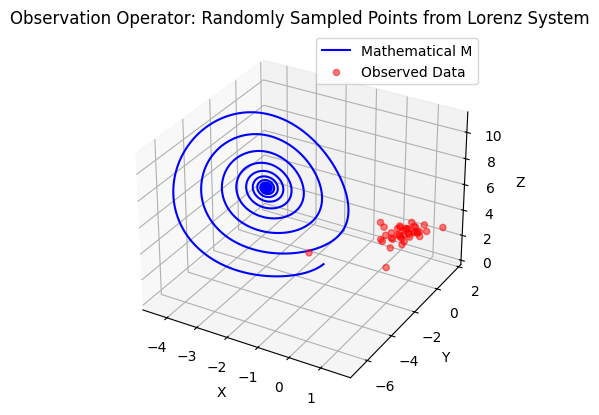

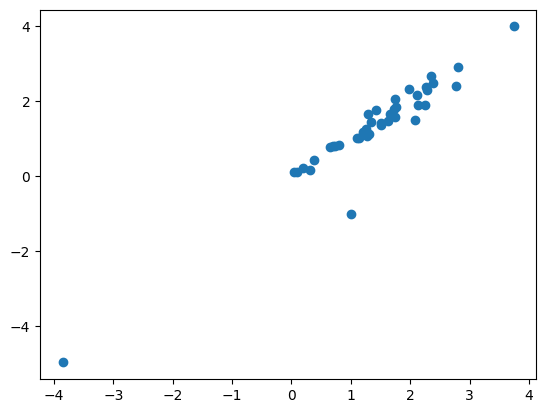

In [73]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
#np.random.seed(42)

# Define the Lorenz system
def lorenz_system(t, state, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Function to simulate the Lorenz system
def simulate_lorenz_system(t_span, initial_state, num_samples):
    # Parameters
    sigma = 3.765432
    rho =  17.654323456
    beta =  8/3

    # Initial conditions
    xyz0 = [-3.345, -3.2, 1]

    # Time vector
    t_span = (0,40)
    t_eval = np.linspace(*t_span, 132651)

    # Solve the system
    sol = solve_ivp(lorenz_system, t_span, xyz0, args=(sigma, rho, beta), t_eval=t_eval)
    sol_stoch = solve_ivp(lorenz_stochastic, t_span, [1, -1, 1.5], t_eval=t_eval)
    return sol.t, sol.y, sol_stoch.y

def lorenz_stochastic(t, state):
    sigma = 7.9654345876543
    rho =  7.765434567
    beta =  0.45678987465473829   

    # Initial condition

    # Time vector
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    dxdt += 5*np.random.normal(0, 1)
    dydt += 5*np.random.normal(0, 1)
    dzdt += 5*np.random.normal(0, 1)
    return [dxdt, dydt, dzdt]

import numpy as np

import numpy as np

# Observation operator: Sample points sequentially from the provided trajectory
def observation_operator(true_state, num_samples):
    """
    Observation operator H. This function samples points sequentially from the true state trajectories.

    Parameters:
    true_state (ndarray): True state of the system.
    num_samples (int): Number of points to sample.

    Returns:
    observed_data (ndarray): Sampled data from the true state trajectories.
    """
    # Calculate the number of points to skip between samples
    skip = max(1, true_state.shape[1] // num_samples)
    
    # Sample points sequentially with even spacing
    sampled_indices = np.arange(0, true_state.shape[1], skip)[:num_samples]
    
    # Extract true state at the sampled indices
    observed_data = true_state[:, sampled_indices]
    
    return observed_data

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_observation_operator(true_state, observed_data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot true state trajectory
    ax.plot(true_state[0, :]/2.5, true_state[1, :]/2.5, true_state[2, :]/2.5, color='b', label='Mathematical M')

    # Plot observed data points
    ax.scatter(observed_data[0, :]/2.5, observed_data[1, :]/2.5, observed_data[2, :]/2.5, color='r', label='Observed Data', alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Observation Operator: Randomly Sampled Points from Lorenz System')
    ax.legend()

    plt.show()
# Simulate the Lorenz system
t, true_state, obs = simulate_lorenz_system((0, 40), [1.0, 1.0, 1.0], num_samples=132651)

# Apply observation operator to obtain observed data
observed_data = observation_operator(obs, num_samples=40)
# Plot the observation operator
plot_observation_operator(true_state, observed_data)

plt.scatter(observed_data[0, :], observed_data[1,:])

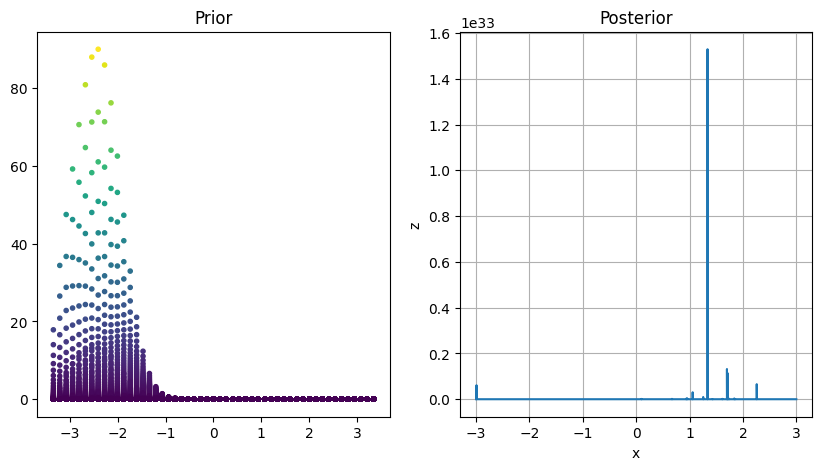

In [74]:
from scipy.interpolate import interp1d
data_sol = np.load('/media/adam/Unix_Partition2/docker_neural_operator/docker/Code Base Fourier NO/lorenz63-fokker-planck-main/pypde/fenics_run_plots_main/tests/test13/pdf_250.npy')
fpe_solution = data_sol[2, :]
fpe_solution[fpe_solution < 0] = 0
y_k = observed_data # 3D ARRAY
hist_y, xedges, yedges = np.histogram2d(y_k[0], y_k[2], bins=300, density=True)
y_k = hist_y.ravel()
#y_k = y_k/np.trapz(y_k)
x_k = true_state[:, :len(y_k)]    # 3D ARRAY
hist_x, xedges_x, yedges_x = np.histogram2d(x_k[0], x_k[2], bins=300, density = True)
plt.figure(figsize=(10, 5))
x_k = hist_x.ravel()
plt.subplot(1, 2, 1)
plt.scatter(data[0, :], fpe_solution, c= fpe_solution, marker = '.')
plt.title('Prior')

plt.subplot(1, 2, 2)
# Likelihood calculation
# Given array p_y_x and its original interval - posterior calculation from FPE
#signs = [np.sign(y - f) for y, f in zip(y_k, fpe_solution[:len(y_k)])]

# Calculate p_y_x - posterior 
p_y_x =  (np.exp((np.array(y_k) - np.array(fpe_solution[:len(y_k)])))**2) * np.array(fpe_solution[:len(y_k)]) 

# Original interval
original_interval = np.linspace(-3, 3, len(p_y_x))

# New interval
new_interval = np.linspace(-3, 3, 100000)  # squish to -3, 3 (computation domain)

# Interpolate onto the new interval
interpolated_array = np.interp(new_interval, original_interval, p_y_x)
plt.plot(new_interval, interpolated_array)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Posterior')
plt.grid(True)
plt.show()


seems to check out...do post processing before putting into diss